# Diabetes Predictor Model - Exploratory Data Analysis

#### In the last 'Data Wrangling' notebook, we took a look at the Diabetes dataset for completeness and cleaned up the column of the target variable (DiabetesDiagnosis). 

#### In this notebook we will:
#### 1. Explore each individual variable in the dataset
#### 2. Assess the relationship between each variable and the target
#### 3. Assess interactions between variables

In [1]:
# Importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

#show plots inline
%matplotlib inline

In [2]:
# Supress future warnings

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
# Loading the dataset

df = pd.read_csv('cleaned_diabetes_df.csv')

In [4]:
# Looking at the shape and first few rows of dataset

print(df.shape)
print(df.head())

(253680, 22)
  DiabetesDiagnosis  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0          diabetes     1.0       1.0        1.0  25.0     0.0     0.0   
1          diabetes     0.0       0.0        1.0  29.0     0.0     0.0   
2          diabetes     1.0       1.0        1.0  35.0     1.0     0.0   
3          diabetes     1.0       0.0        1.0  31.0     0.0     0.0   
4          diabetes     1.0       1.0        1.0  26.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   1.0           1.0     1.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     0.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      2.0       0.0       0.0     

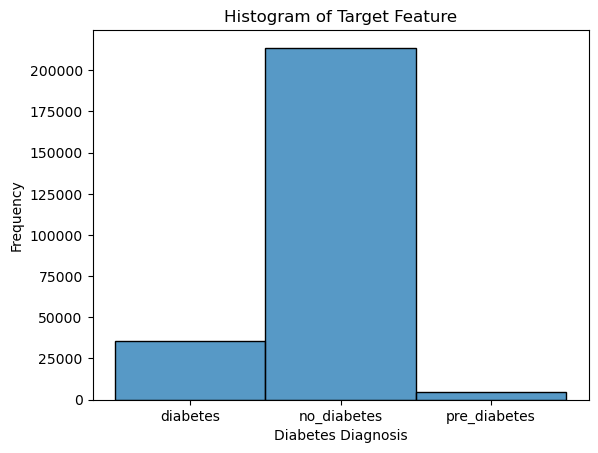

In [5]:
# Creating a univariate chart of my target (DiabetesDiagnosis)
# Creating a Histogram in this instance

sns.histplot(df['DiabetesDiagnosis'], bins=30, kde=False, discrete=True)
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Frequency')
plt.title('Histogram of Target Feature')
plt.show()

### Creating Bivariate Charts to Compare Each Feature to the Target Feature

In [77]:
# Grouping 'diabetes' with 'pre_diabetes' for the purpose of the below bivariate charts

# Defining category grouping
group_mapping = {'diabetes' : 'diabetes', 'pre_diabetes' : 'diabetes', 'no_diabetes' : 'no_diabetes'}

# Applying the mapping to the 'DiabetesDiagnosis' column
df['DiabetesDiagnosisGrouped'] = df['DiabetesDiagnosis'].map(group_mapping)

## make a more simpler logic to replace the above
## if df[diabetesdiagnosis] == 'diabetes' or df[diabetesdiagnosis] == 'pre_diabetes':
    ## df[diabetesdiagnosis] == 1 
    ## else :
    ## df[diabetesdiagnosis] == 0
    ##

In [8]:
print(df[['MentHlth', 'PhysHlth']].head(20))
print(df[['MentHlth', 'PhysHlth']].value_counts()) 
print(df[['MentHlth', 'PhysHlth']].dtypes)

    MentHlth  PhysHlth
0        0.0       0.0
1        0.0       0.0
2        1.0      30.0
3        0.0       0.0
4        0.0      10.0
5       30.0      15.0
6        0.0      30.0
7        0.0       0.0
8        0.0       0.0
9        0.0       0.0
10       2.0       4.0
11       0.0       0.0
12      30.0      17.0
13       0.0       0.0
14       0.0       0.0
15       7.0       0.0
16       0.0       0.0
17       5.0      10.0
18       1.0       0.0
19       0.0       3.0
MentHlth  PhysHlth
0.0       0.0         125985
          30.0          9129
          2.0           8802
2.0       0.0           7292
0.0       1.0           6739
                       ...  
15.0      16.0             1
2.0       17.0             1
26.0      1.0              1
14.0      28.0             1
13.0      29.0             1
Name: count, Length: 713, dtype: int64
MentHlth    float64
PhysHlth    float64
dtype: object


In [9]:
# Making the above features into integers instead of floats

df['MentHlth'] = df['MentHlth'].astype(int)
df['PhysHlth'] = df['PhysHlth'].astype(int)

print(df[['MentHlth', 'PhysHlth']].head())
print(df[['MentHlth', 'PhysHlth']].dtypes)

   MentHlth  PhysHlth
0         0         0
1         0         0
2         1        30
3         0         0
4         0        10
MentHlth    int64
PhysHlth    int64
dtype: object


In [10]:
# Checking for NaN values

print(df['MentHlth'].isna().sum())
print(df['PhysHlth'].isna().sum())


0
0


In [13]:
# Making my two continuous features (MentHlth & PhysHlth) into categorical features by using buckets

df['MentHlth'] = df['MentHlth'].clip(0, 30)
df['PhysHlth'] = df['PhysHlth'].clip(0, 30)

# Starting first with 'MentHlth'
df['MentHlth'] = pd.cut(df['MentHlth'], bins=[0, 7, 14, 21, 28, 30], labels=[1, 2, 3, 4, 5], right=True, include_lowest=True)

# Moving onto 'PhysHlth'
df['PhysHlth'] = pd.cut(df['PhysHlth'], bins=[0, 7, 14, 21, 28, 30], labels=[1, 2, 3, 4, 5], right=True, include_lowest=True)


In [16]:
print(df[['MentHlth', 'PhysHlth']].head())
print(df[['MentHlth', 'PhysHlth']].value_counts()) 

  MentHlth PhysHlth
0        1        1
1        1        1
2        1        5
3        1        1
4        1        2
MentHlth  PhysHlth
1         1           195539
          5            11721
          2             7429
2         1             5795
1         3             5733
5         1             5382
3         1             5142
5         5             4713
3         5             1781
          3             1403
1         4             1138
2         5             1067
5         3             1065
2         2              886
4         1              873
2         3              812
5         2              734
3         2              708
5         4              352
4         5              333
3         4              317
4         4              227
          3              221
2         4              190
4         2              119
Name: count, dtype: int64


In [17]:
# Checking for NaN values

print(df['MentHlth'].isna().sum())
print(df['PhysHlth'].isna().sum())

0
0


In [23]:
# Checking my data types

print(df.dtypes)

DiabetesDiagnosis             object
HighBP                       float64
HighChol                     float64
CholCheck                    float64
BMI                          float64
Smoker                       float64
Stroke                       float64
HeartDiseaseorAttack         float64
PhysActivity                 float64
Fruits                       float64
Veggies                      float64
HvyAlcoholConsump            float64
AnyHealthcare                float64
NoDocbcCost                  float64
GenHlth                      float64
MentHlth                    category
PhysHlth                    category
DiffWalk                     float64
Sex                          float64
Age                          float64
Education                    float64
Income                       float64
DiabetesDiagnosisGrouped      object
dtype: object


In [28]:
# Converting my categorical features into the category dtype

categorical_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
df[categorical_columns] = df[categorical_columns].astype('category')

# Converting BMI instead INT dtype
df['BMI'] = df['BMI'].astype(int)

print(df.dtypes)

DiabetesDiagnosis             object
HighBP                      category
HighChol                    category
CholCheck                   category
BMI                            int64
Smoker                      category
Stroke                      category
HeartDiseaseorAttack        category
PhysActivity                category
Fruits                      category
Veggies                     category
HvyAlcoholConsump           category
AnyHealthcare               category
NoDocbcCost                 category
GenHlth                     category
MentHlth                    category
PhysHlth                    category
DiffWalk                    category
Sex                         category
Age                         category
Education                   category
Income                      category
DiabetesDiagnosisGrouped      object
dtype: object


(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

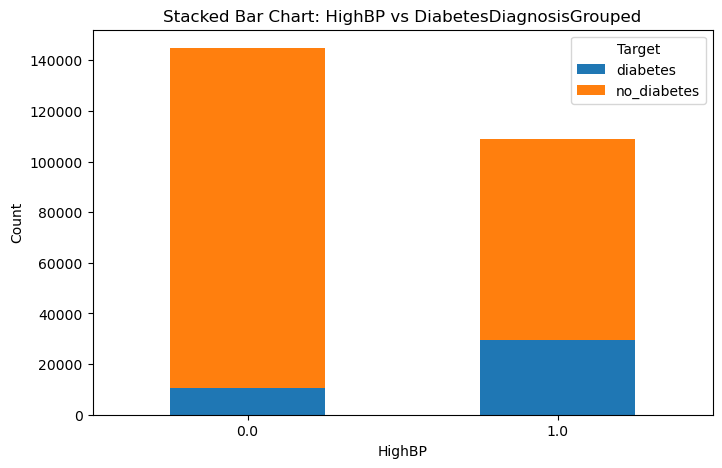

In [30]:
# Have you ever been told by a health professional that you have had high blood pressure?
# 0 = no high blood pressure
# 1 = high blood pressure

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['HighBP'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('HighBP')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: HighBP vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)


(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

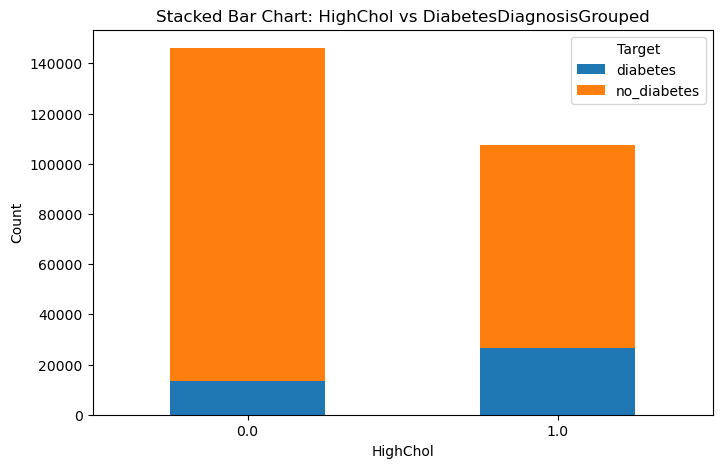

In [32]:
# Have you ever been told by a health professional that your blood cholesterol is high?
# 0 = no high cholesterol
# 1 = high cholesterol

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['HighChol'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('HighChol')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: HighChol vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

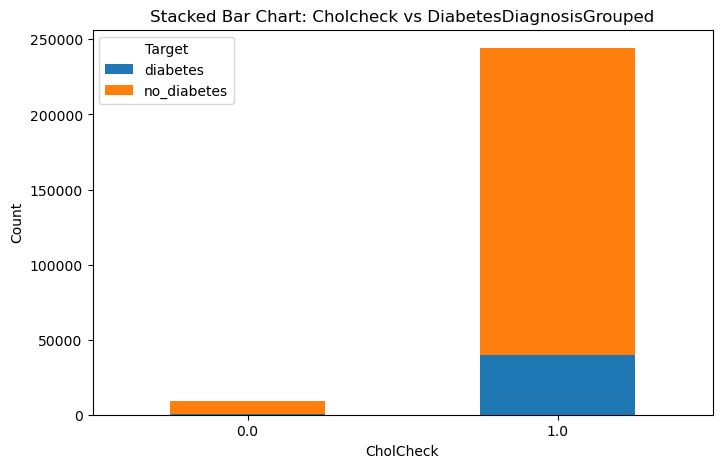

In [34]:
# Have you had your cholesterol checked within the past 5 years?
# 0 = no, cholesterol check in 5 years
# 1 = yes, cholesterol check in 5 years

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['CholCheck'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('CholCheck')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Cholcheck vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

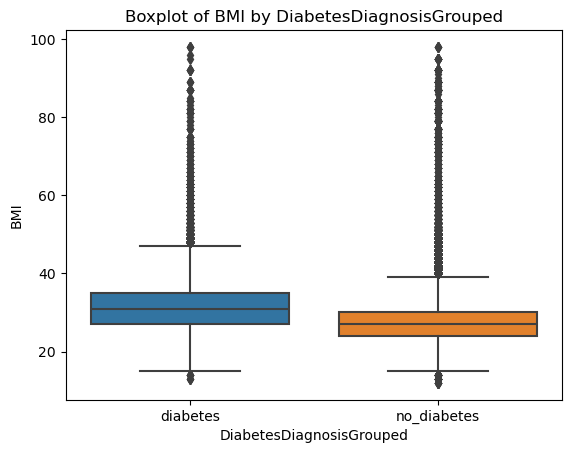

In [36]:
# Continuous variable of BMI (Body Mass Index) number

sns.boxplot(x='DiabetesDiagnosisGrouped', y='BMI', data=df)
plt.xlabel('DiabetesDiagnosisGrouped')
plt.ylabel('BMI')
plt.title('Boxplot of BMI by DiabetesDiagnosisGrouped')
plt.show()

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

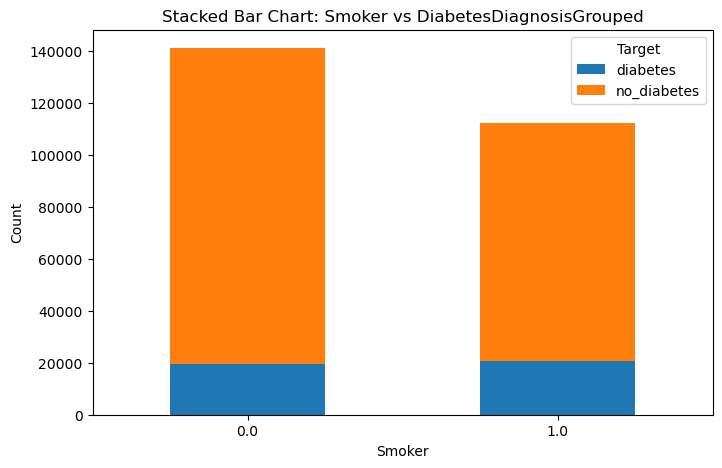

In [38]:
# Have you smoked at least 100 cigarettes in your entire life? (5 packs is equal to 100 cigarettes)
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['Smoker'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Smoker vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

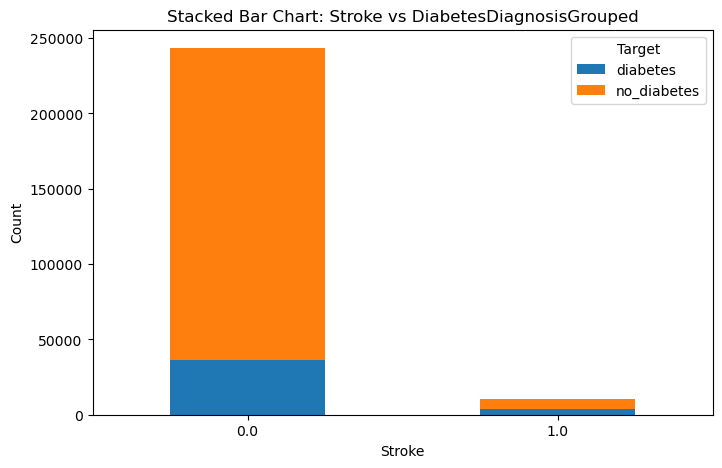

In [40]:
# Have you ever been told you have had a stroke?
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['Stroke'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Stroke vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

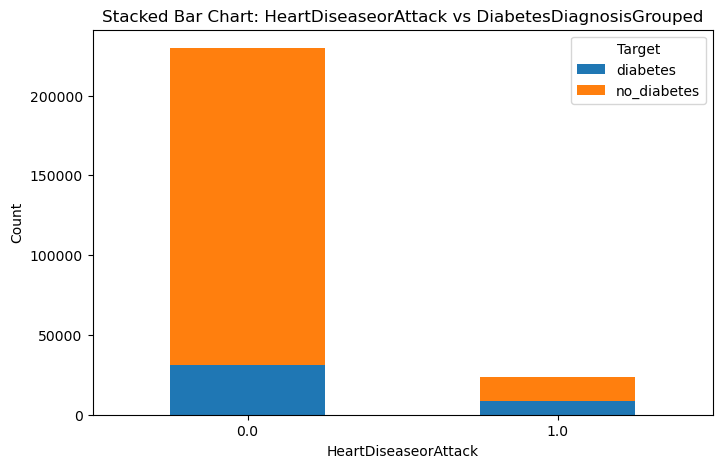

In [42]:
# Have you ever had/have Coronary Heart Disease (CHD) OR have you ever had a Myocardial Infarction (MI)
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['HeartDiseaseorAttack'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('HeartDiseaseorAttack')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: HeartDiseaseorAttack vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

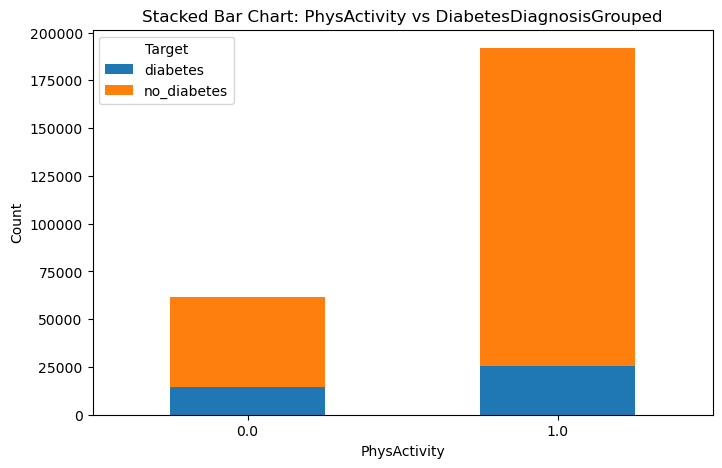

In [44]:
# Have you had any physical activity or exercise during the past 30 days? Not including your job
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['PhysActivity'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('PhysActivity')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: PhysActivity vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

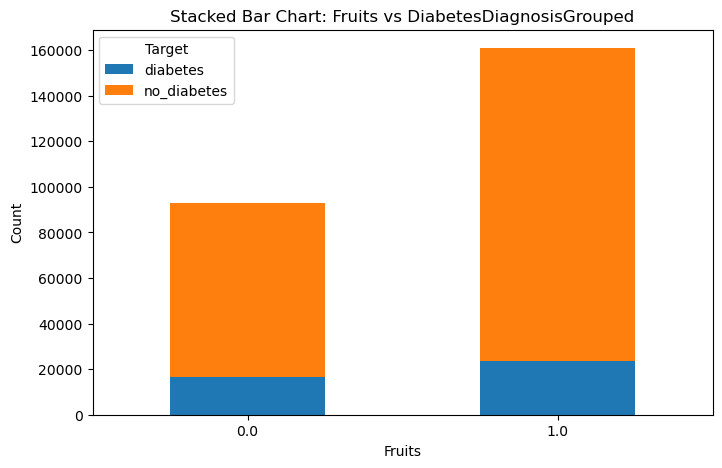

In [46]:
# Do you consume fruit 1 or more times per day?
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['Fruits'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('Fruits')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Fruits vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

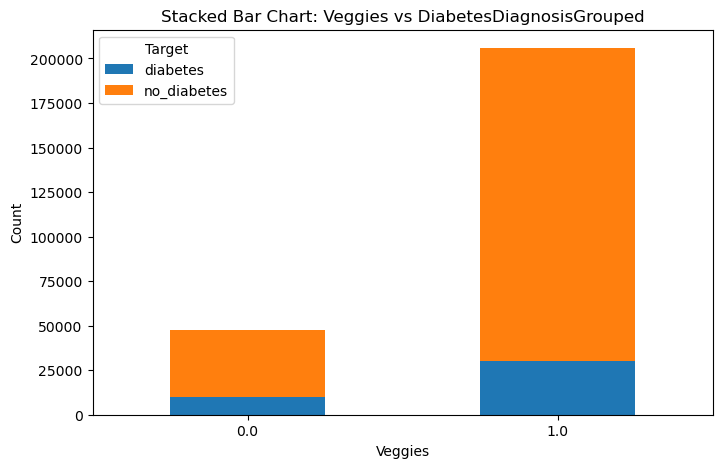

In [48]:
# Do you consume vegetables 1 or more times per day?
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['Veggies'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('Veggies')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Veggies vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

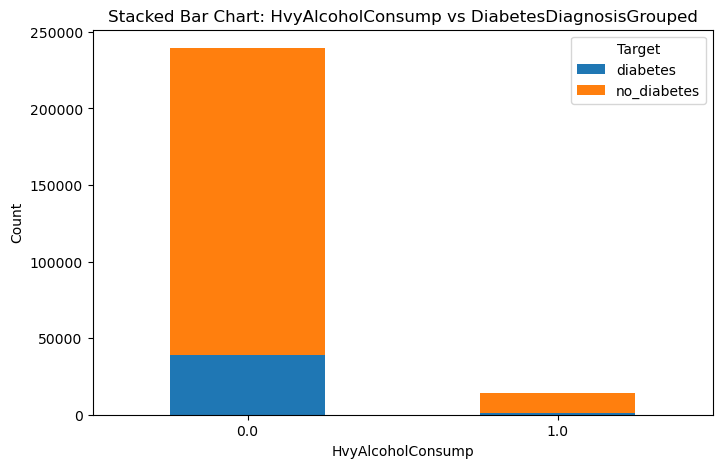

In [50]:
# Are you a heavy drinker? Adult men having more than 14 drinks per week. Adult women having more than 7 drinks per week.
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['HvyAlcoholConsump'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('HvyAlcoholConsump')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: HvyAlcoholConsump vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

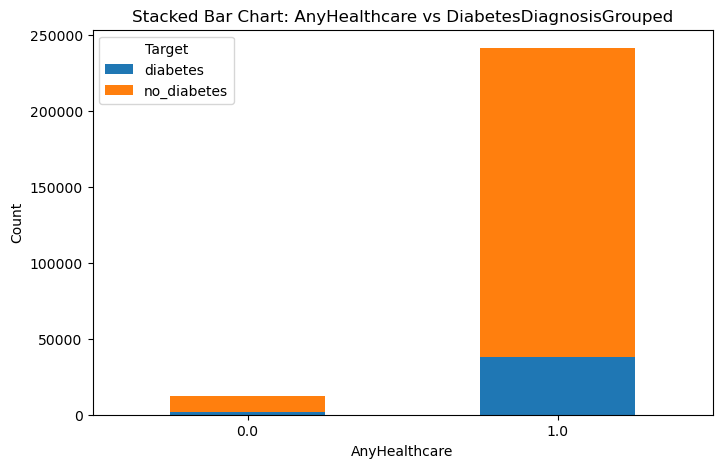

In [52]:
# Do you have any kind of healthcare coverage? Including health insurance, prepaid plans such as HMO, etc?
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['AnyHealthcare'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('AnyHealthcare')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: AnyHealthcare vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

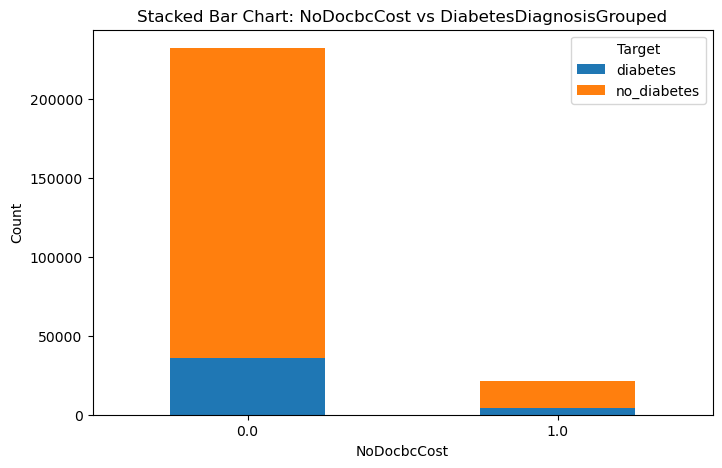

In [54]:
# Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['NoDocbcCost'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('NoDocbcCost')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: NoDocbcCost vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0')])

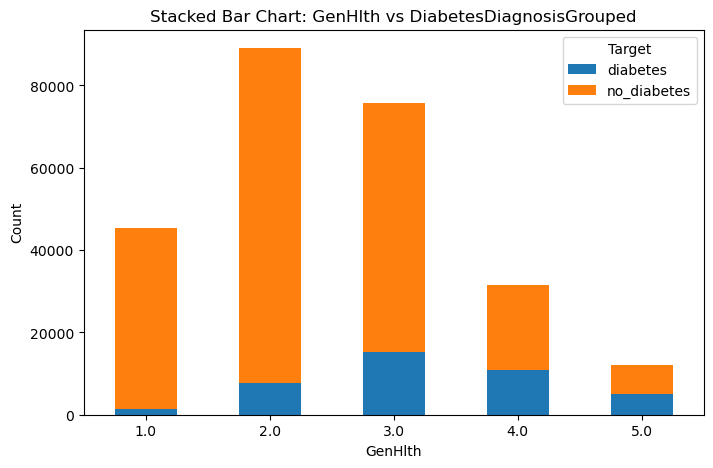

In [56]:
# Would you say that in general your health is 1-5 scale. 
# 1 = excellent
# 2 = very good
# 3 = good
# 4 = fair
# 5 = poor

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['GenHlth'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('GenHlth')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: GenHlth vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

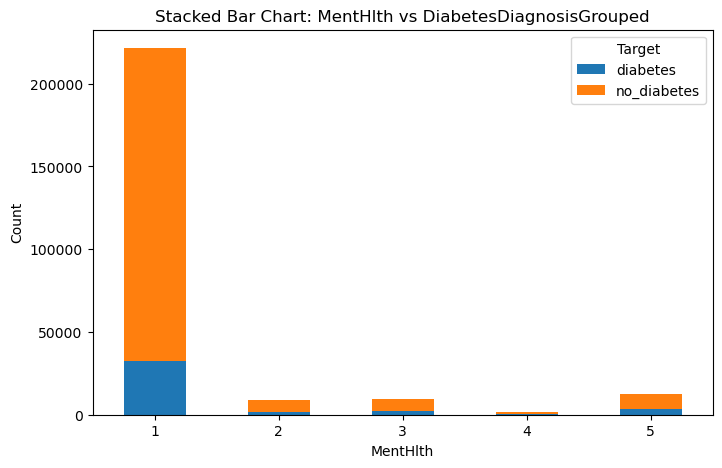

In [58]:
# Thinking about your mental health which includes stress, depression, and problems with emotions...
# How many days during the past 30 days was your mental health not good?
# 1 = 1 week
# 2 = 2 weeks
# 3 = 3 weeks
# 4 = 4 weeks
# 5 = 5 weeks

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['MentHlth'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('MentHlth')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: MentHlth vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

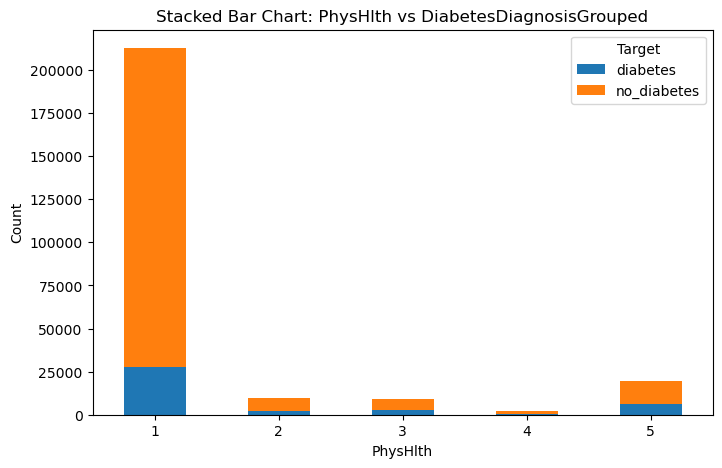

In [60]:
# Thinking of your physical health which includes physical illness and injury...
# How many days during the past 30 days was your physical health not good?
# 1 = 1 week
# 2 = 2 weeks
# 3 = 3 weeks
# 4 = 4 weeks
# 5 = 5 weeks

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['PhysHlth'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('PhysHlth')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: PhysHlth vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

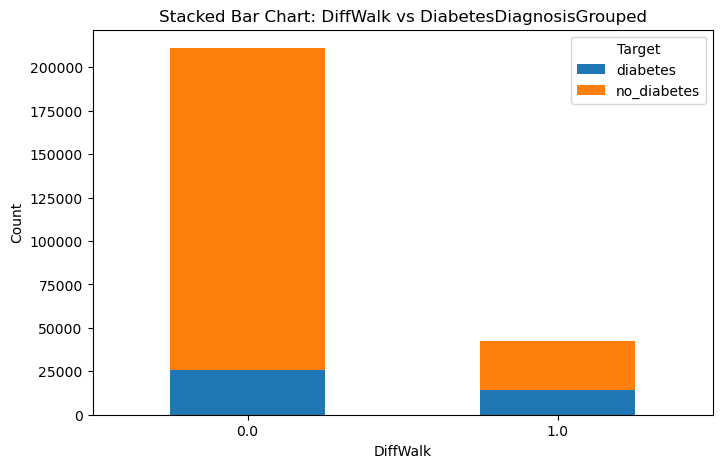

In [62]:
# Do you have serious difficulty walking or climbing stairs?
# 0 = no
# 1 = yes

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['DiffWalk'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('DiffWalk')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: DiffWalk vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

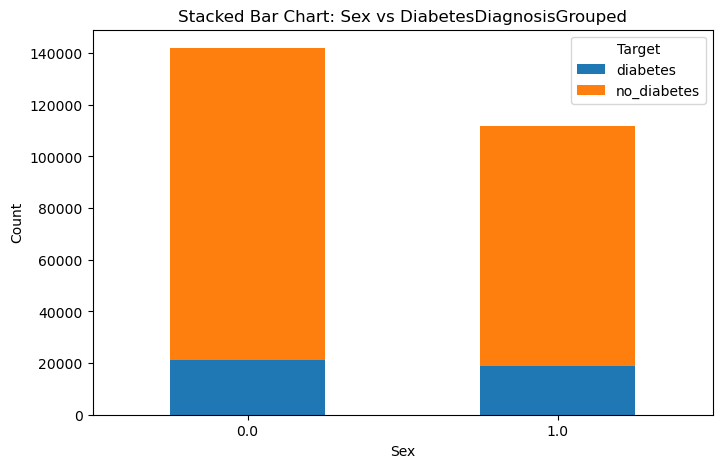

In [64]:
# What is your gender?
# 0 = female
# 1 = male

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['Sex'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Sex vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0')])

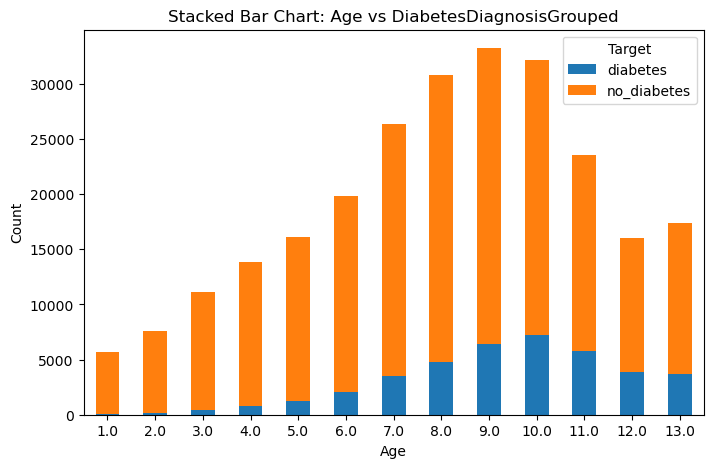

In [66]:
# What is your age?
# 1 = 18-24
# 2 = 25-29
# 3 = 30-34
# 4 = 35-39
# 5 = 40-44
# 6 = 45-49
# 7 = 50-54
# 8 = 55-59
# 9 = 60-64
# 10 = 65-69
# 11 = 70-74
# 12 = 75-79
# 13 = 80 or older

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['Age'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Age vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0')])

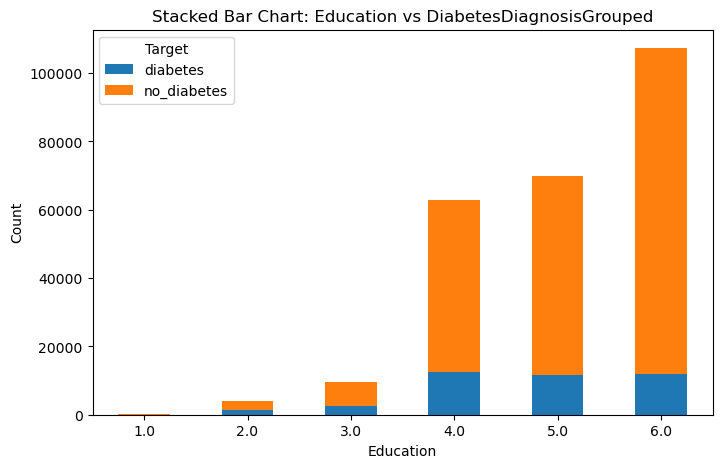

In [68]:
# What is your education level?
# 1 = never attended school or only kindergarten
# 2 = grades 1-8 (elementary)
# 3 = grades 9-12 (some high school)
# 4 = grades 12 or GED (high school graduate)
# 5 = college 1 year to 3 years (some college or technical school)
# 6 = college 4 years or more (college graduate)

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['Education'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Education vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0')])

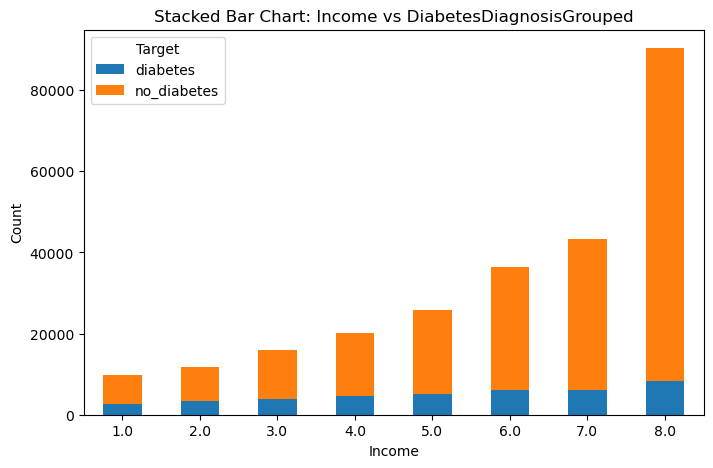

In [70]:
# What is your income level?
# 1 = less than $10,000
# 2 = less than $15,000
# 3 = less than $20,000
# 4 = less than $25,000
# 5 = less than $35,000
# 6 = less than $50,000
# 7 = less than $75,000
# 8 = $75,000 or more

# Creating a contingency table (cross-tabulation of counts)
count_data = pd.crosstab(df['Income'], df['DiabetesDiagnosisGrouped'])

# Plot stacked bar chart
count_data.plot(kind='bar', stacked=True, figsize=(8, 5))

#Lables & titles
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Income vs DiabetesDiagnosisGrouped')
plt.legend(title='Target')
plt.xticks(rotation=0)

### Building Correlation Heatmap of All Features and Target Feature

In [73]:
# Will use Cramer's V score to create a correlation heatmap

from scipy.stats import chi2_contingency

In [ ]:
# just use .corr function...that should be fine...(vinit)

In [74]:
# Extracting features and target 
# target = dependent variable
# features = dataframe of numerical features (independent variables)

target = df['DiabetesDiagnosis']
features = df.drop(columns=['DiabetesDiagnosis'])

from sklearn.feature_selection import f_classif

In [75]:
# Compute ANOVA F-statistic for each numerical feature relative to the categorical target'
# What is ANOVA statistic? It measures the variance between groups vs. the variance within groups
# A higher F-statistic means that the feature is more relevant in distinguishing categories in 'target'

# p-values were ignored using "_" since we are not using them in this step

anova_values, _ = f_classif(features, target) 

# Create a DataFrame for correlation values

anova_results = pd.DataFrame(anova_values, index=features.columns, columns=['ANOVA F-Score'])

ValueError: could not convert string to float: 'diabetes'

In [ ]:
# Plot heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(anova_results, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.title('ANOVA F-Score Heatmap (Correlation Between Target & Features)')
plt.show()

#### An ANOVA F-Score Heatmap shows the relationship between a categorical target feature and the numerical features. 
#### The higher the F-score, the stronger association between the numerical feature and the categorical feature
#### The lower the F-score, the feature does not differentiate well across target categories

#### Based on the above heatmap, I can make an obersvation that...
#### High Blood Pressure, BMI, High Cholesterol, General Health, Difficulty Walking, Physical Health, and Age are the most storngly correlated variables with the target feature (Diabetes Diagnosis)

### Diving Deeper Into the Strong Correlations Discovered in the ANOVA F-Score Heatmap

In [64]:
# INPUT DIVING DEEPER INTO THE CORRELATIONS HERE
#plot scatter/line plot...skip this if i did it above...

### Using Random Forest to Get Feature Importance for the Features

In [67]:
# Loading the packages needed

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

In [69]:
# Since the target feature is categorical, encoding it into numerical labels
# I don't need to do this...this doesn't hurt though....

label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

In [71]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.25, random_state=42)

# X_train = training data (independent variables)
# X_test = testing data (independent variables)
# y_train = training labels (dependent variable)
# y_test = testing labels (dependent variable)

In [73]:
# Training the random forest classifer model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
# Getting feature importances 

importances = rf_model.feature_importances_

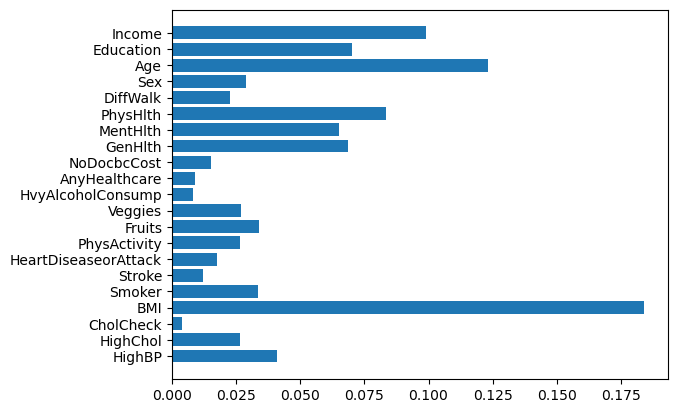

In [77]:
# put it descending...

plt.barh(features.columns, importances)
plt.show()

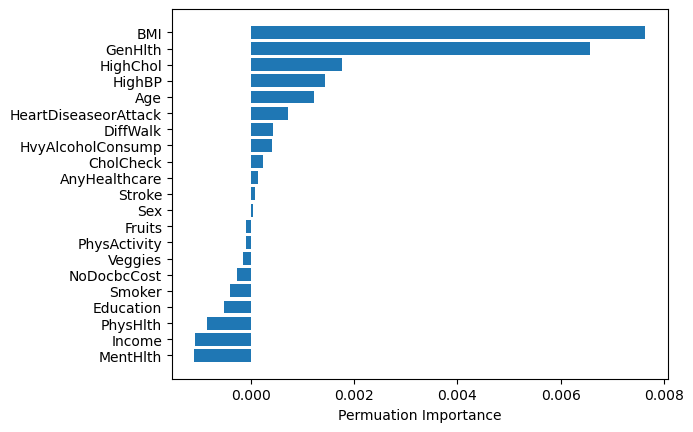

In [81]:
# Permutation based feature importance with scikit-learn to overcome drawbacks of default feature importance computed with mean impurity decrease

perm_importance = permutation_importance(rf_model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)

# Sorting feature importances

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Permuation Importance')
plt.show()

### Findings

#### From my findings from the EDA portion of the data science pipeline revealed that the strongest positive correlations between my target feature and the numerical features are: BMI, General Health, High Cholesterol, and High Blood Pressure.

In [ ]:
# AUC and accuracy metric...AUC ROC score...
# try XG boost model also to see if RF is better or not....
# the above is modeling.....don't do yet...